# Predicting Insurance Costs

#### Table of Contents
* [Introduction](#1)
* [Explore dataset](#2)
* [Explore variables](#3)
* [Divide the Dataset](#4)
* [Construct the Model](#5)
* [Residual Diagnostics](#6)
* [Test Evaluation](#7)
* [Conclusion](#8)

#### Introduction <a class='anchor' id='1'></a>

For this project, we'll be looking at the Medical Cost Data Set from Kaggle. This dataset contains information on individual medical insurance bills. Each bill is associated with some demographic and personal characteristics of the person who received it.

For our regression problem, we're interested in how these different characteristics relate to the total medical cost.

For this guided project, we want to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task because it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

In [32]:
#Import libraries that we will use
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns, matplotlib.pyplot as plt

#### Explore dataset <a class='anchor' id='2'></a>

In [33]:
#Load dataset
insurance = pd.read_csv("D:/DataQuest/insurance.csv")

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In [34]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


numeric data = age, bmi, charges, children

categorical - sex, smoker, region

#### Explore variables <a class='anchor' id='3'></a>

In [36]:
corr_matrix = insurance.select_dtypes(exclude=['object']).corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [37]:
categories = insurance.select_dtypes(include=['object']).columns.tolist()
print(categories)
cat_insurance = insurance.select_dtypes(include=['object'])
cat_insurance['charges'] = insurance['charges']

['sex', 'smoker', 'region']


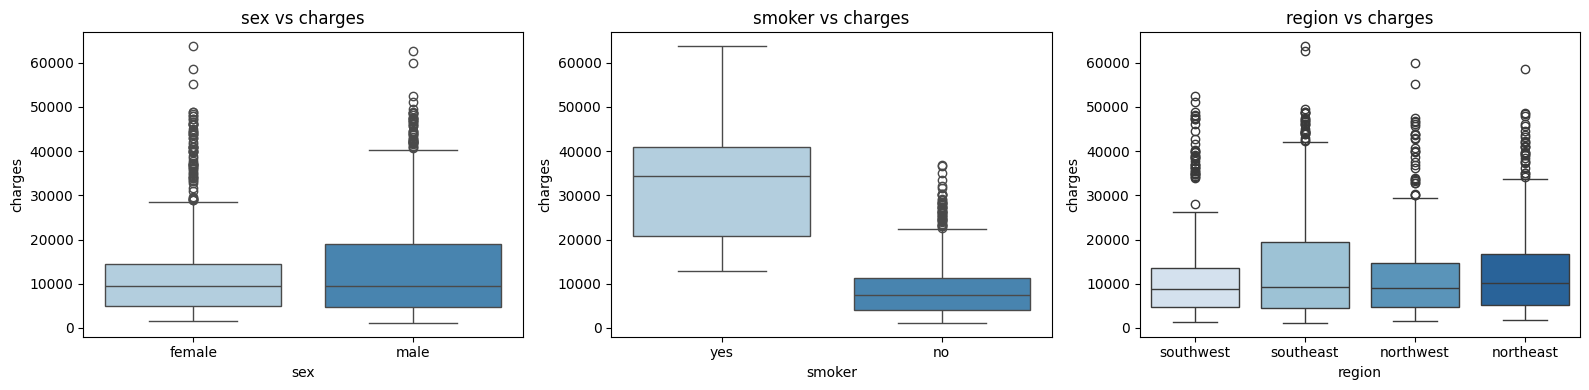

In [38]:
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax = ax.flatten()

for i,x in enumerate(categories):
    sns.boxplot(x=x,y='charges',data=cat_insurance,hue=x, ax=ax[i], palette='Blues')
    ax[i].set_title(f"{x} vs charges")

plt.tight_layout()
plt.show()

It looks like age and smoker status could be interesting predictor variables to look into. BMI could be interesting too.

#### Divide the Dataset <a class='anchor' id='4'></a>

In [39]:
X = insurance.drop('charges',axis=1)
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=512)

In [40]:
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


In [41]:
#Create subset for target variables
X_train_subset = X_train[['age','bmi','smoker']]
X_test_subset = X_test[['age','bmi','smoker']]

In [42]:
#Convert smoker column to binary 0/1 0 for no 1 for yes
X_train_subset.loc[:,'smoker'] = X_train_subset['smoker'].apply(lambda x: 1 if x =='yes' else 0)
X_test_subset.loc[:,'smoker'] = X_test_subset['smoker'].apply(lambda x: 1 if x =='yes' else 0)

#### Construct the Model <a class='anchor' id='5'></a>

In [43]:
#Fit model on training data subset
model = LinearRegression()
model.fit(X_train_subset,y_train)

LinearRegression()

In [44]:
#Examine the coefficients for each variable
slope = model.coef_
print(slope)

[  249.10140679   327.82859588 23988.44868992]


Coefficient is largest for smoking status while controlled for age and bmi.
This is followed by bmi then age.

In [45]:
#Determine the R2 - coefficient of determination
predictions = model.predict(X_train_subset)
R2 = r2_score(y_train, predictions)
R2

0.7555178505557617

R2 shows strong correlation.

In [46]:
#Calculate MSE
training_mse = mean_squared_error(y_train, predictions)
training_rmse = mean_squared_error(y_train, predictions, squared = False)
print(training_mse)
print(training_rmse)

35554161.11846722
5962.731011748494


Root of the squared mean error is acceptable.

#### Residual Diagnostics <a class='anchor' id='6'></a>

In [47]:
#Find residuals means
residuals = y_train - predictions
residual_mean = np.mean(residuals)
residual_mean

1.5775908098042568e-12

Residual mean is close to 0.

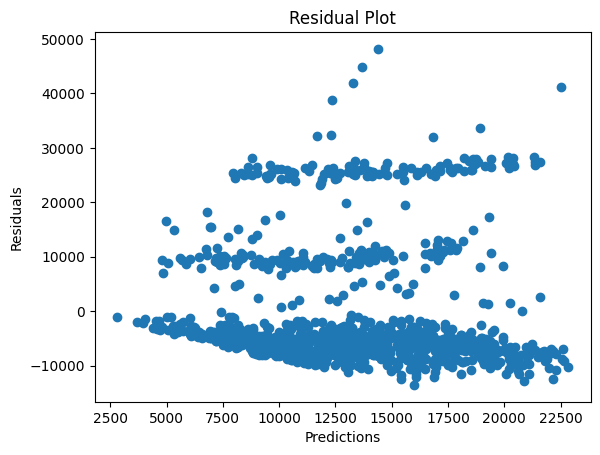

In [55]:
#Check residual plot
plt.scatter(predictions, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The plots show some sort of trend. We will look into this.

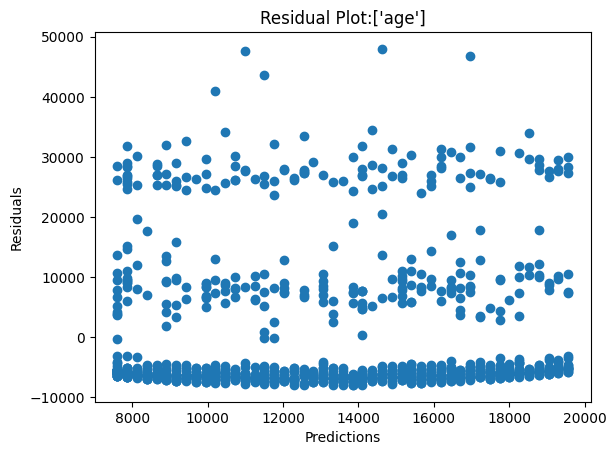

In [56]:
unit = ['age']
X_train_subset_loc = X_train_subset[unit]
model.fit(X_train_subset_loc,y_train)
predictions = model.predict(X_train_subset_loc)
residuals = y_train - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title(f"Residual Plot:{unit}")
plt.show()

Age is distributed mostly around 0 with little variance.

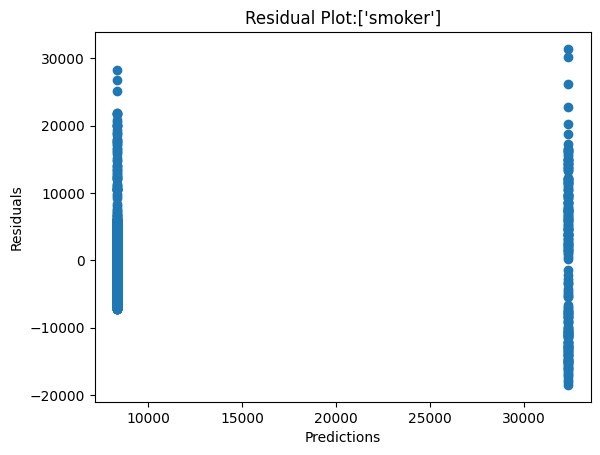

In [57]:
unit = ['smoker']
X_train_subset_loc = X_train_subset[unit]
model.fit(X_train_subset_loc,y_train)
predictions = model.predict(X_train_subset_loc)
residuals = y_train - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title(f"Residual Plot:{unit}")
plt.show()

Smoker status forms a dichotomous linear line. This can be expected of categorical variables. Residual plots may not be the best way to test for heteroscedasticity.

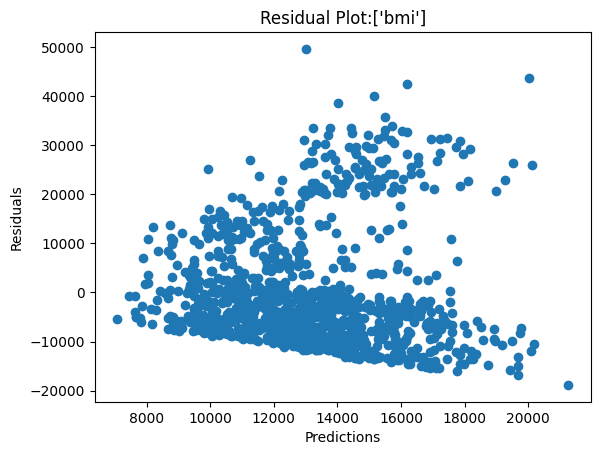

In [58]:
unit = ['bmi']
X_train_subset_loc = X_train_subset[unit]
model.fit(X_train_subset_loc,y_train)
predictions = model.predict(X_train_subset_loc)
residuals = y_train - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title(f"Residual Plot:{unit}")
plt.show()

BMI is also around 0 with some variance

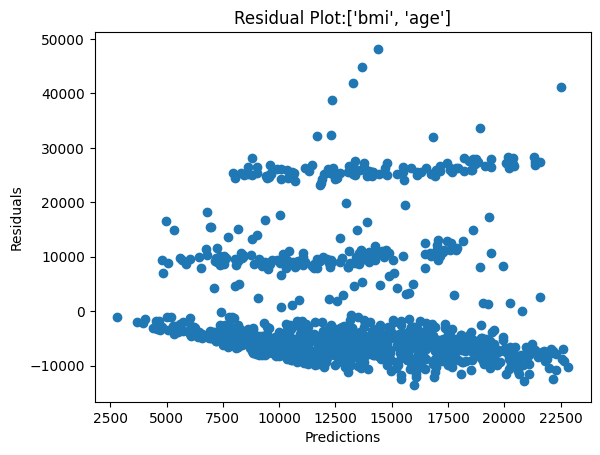

In [59]:
unit = ['bmi','age']
X_train_subset_loc = X_train_subset[unit]
model.fit(X_train_subset_loc,y_train)
predictions = model.predict(X_train_subset_loc)
residuals = y_train - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title(f"Residual Plot:{unit}")
plt.show()

Age combined with bmi seems acceptable.

We will continue our analysis with all the variables.

Costs increases more with bmi while controlling for age. Smoker status increases the cost the most.

The R2 correlation is strong.

#### Test Evaluation <a class='anchor' id='7'></a>

In [53]:
model = LinearRegression()
model.fit(X_train_subset,y_train)
test_predictions = model.predict(X_test_subset)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared = False)
print(test_mse)
print(test_rmse)

42948616.017538674
6553.5193611935465


The model predicts well on the test set compared to the training set.

#### Conclusion <a class='anchor' id='8'></a>

The model makes sense considering the predictor variables. Smoking is often linked to chronic diseases and the presence of multiple chronic diseases tend to lead to higher costs. Age and BMI are also linked to higher healthcare utilization and presence of disease.

The model has a questionable residual plot, which may undermine its validity. Perhaps there is another relationship that is unaccounted for, however, with its high R2 it does have strong correlation with costs. This could possibly be due to overfitting of the model.

In terms of the MSE, the RMSE is 6553, which is a fair amount. 